In [1]:
import nextnanopy as nn
import os
import matplotlib.pyplot as plt
import numpy as np
import sys


In [2]:
print(sys.path)
sys.path.append(r"C:\Users\splatt\nextnanopy_projects")
print(sys.path)
from nextnano_tools.helper_functions import build_output
from nextnano_tools.simstructs import SimOut, BandStructure, Eigenstate

['c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\python313.zip', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\DLLs', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv', '', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\Pythonwin']
['c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\python313.zip', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\DLLs', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv', '', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Li

In [3]:
# base_file_path = r"C:\Users\splatt\Documents\nextnano\Output\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template.nnp"
base_filename = 'InGaAsInAlAs_thinner_valencesubbands_quantumonly_check_maxVB'
parent_dir = r'C:\Users\splatt\Documents\nextnano\Output\InGaAsInAlAs_thinner_valencesubbands_quantumonly_check_maxVB(1)'

input_filepath = os.path.join(parent_dir, base_filename + '.nnp')
# base_file_input = nn.InputFile(input_filepath,product='nextnano++')

# print(base_file_input)

In [4]:
VB_cutoff = 2
bias = r'bias_00000'
quantum_region = r'Quantum\quantum_region'
quantum_band = r'kp8'
quantum_band_interactions = r'kp8_kp8'
simout = build_output(parent_dir,quantum_region,quantum_band,quantum_band_interactions,bias,VB_cutoff,6.0)

In [5]:
simout.bands['VB'].sort_subbands(decreasing=True)
# simout.bands['VB'].remove_subband()

In [6]:
simout.bands['VB'].remove_subband(index=5)

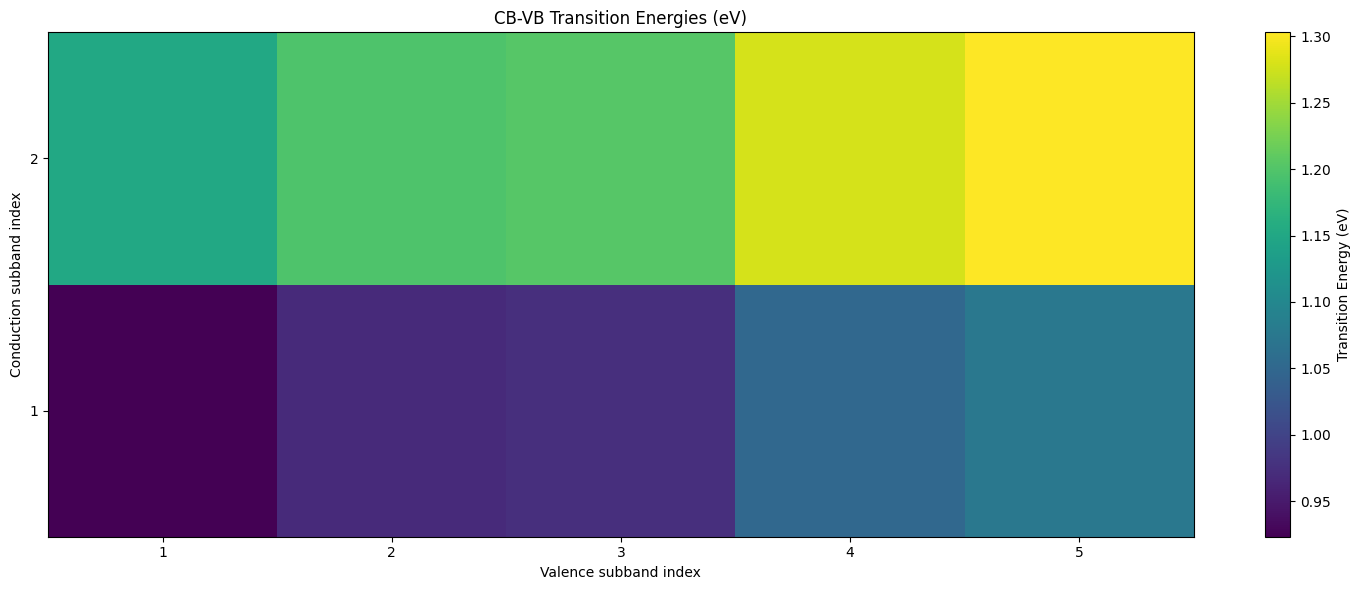


Transition Energies Table:
 VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)
-------------------------------------------------------
       1.5683 (1) |       2.4916 (1) |              0.9233
       1.5231 (2) |       2.4916 (1) |              0.9685
       1.5174 (3) |       2.4916 (1) |              0.9742
       1.4416 (4) |       2.4916 (1) |              1.0500
       1.4169 (5) |       2.4916 (1) |              1.0748
       1.5683 (1) |       2.7198 (2) |              1.1515
       1.5231 (2) |       2.7198 (2) |              1.1967
       1.5174 (3) |       2.7198 (2) |              1.2024
       1.4416 (4) |       2.7198 (2) |              1.2782
       1.4169 (5) |       2.7198 (2) |              1.3029


In [ ]:
# Create transition energy heatmap
import numpy as np

VB_subbands = simout.bands["VB"].get_energies()  # list of Eigenstate objects
CB_subbands = simout.bands["CB"].get_energies()      # all CB subbands
VB_mesh, CB_mesh = np.meshgrid(VB_subbands, CB_subbands)
transition_energies = CB_mesh - VB_mesh # Transpose VB mesh to get correct orientation

# Create figure with two subplots side by side
fig, ax1= plt.subplots(figsize=(15, 6))

# Plot 1: pcolormesh for precise control
pcm = ax1.pcolormesh(np.arange(len(VB_subbands))+1, np.arange(len(CB_subbands))+1, transition_energies, shading='nearest', cmap='viridis')
# matshowtest = ax1.matshow(transition_energies)
ax1.set_xlabel('Valence subband index')
ax1.set_ylabel('Conduction subband index')
ax1.set_title('CB-VB Transition Energies (eV)')


ax1.set_xticks(np.arange(1, len(VB_subbands)+1))
ax1.set_yticks(np.arange(1, len(CB_subbands)+1))

fig.colorbar(pcm, ax=ax1, label='Transition Energy (eV)')

plt.tight_layout()
plt.show()

# Print transition table
print("\nTransition Energies Table:")
print(" VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)")
print("-" * 55)
for i, cb in enumerate(CB_subbands):
    for j, vb in enumerate(VB_subbands):
        print(f" {vb:12.4f} ({j+1}) | {cb:12.4f} ({i+1}) | {transition_energies[i,j]:19.4f}")

#also plot the interband absorption info
